# Using PCA

## Goals

After completing this notebook, you will be able to:
1. Standardize data with `scikit-learn`
2. Perform Principal Component Analysis (PCA) on data
3. Evaluate the influence of different principal components by seeing how much variance they explain
4. Be able to transform data into lower dimensions uing PCA
5. Be able to use KernelPCA to separate nonlinearly separable data

## 0. Our Imports

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Import for 3d plotting
from mpl_toolkits import mplot3d

# For making nonlinear data
from sklearn.datasets import make_circles

%matplotlib inline

## 1. Getting Example Data

Today we'll be looking at sklearn's breast cancer identification dataset. You could get this directly from sklearn with `from sklearn.datasets import load_breast_cancer`, but its good to practice reading in data so we'll do it by hand. There are two files you'll need for this data:

- `cancer.csv` contains the cell measurements
- `target.csv` has if each cell is malignant (1) or benign (0).

cancer.csv link here

target.csv link here

<font size=8 color="#009600">&#9998;</font> Do This - Read in these files as separate DataFrames with `pd.read_csv()`and print ther `head()`s.

In [2]:
### ANSWER ###

target = pd.read_csv("target.csv", names = ['target'])
data = pd.read_csv('cancer.csv')
target.head()
data.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.1 Getting the right columns

Note that the dataframe from `cancer.csv` has a column that is just the index again. This isn't actually part of the data so you should get rid of it. 


<font size=8 color="#009600">&#9998;</font> Use the DataFrame `drop()` method to make a new DataFrame that doesen't have this extra column.

In [3]:
### ANSWER ###

data_dropped = data.drop('Unnamed: 0', axis = 1)
data_dropped.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


How many features does this data have? Does all of the data fall on the same scale?

### 1.2 Scaling the Data


Like you saw in the previous notebook, to use PCA to reduce the number of features, the data needs to be scaled. 


<font size=8 color="#009600">&#9998;</font> Do this - use `sklearn.preprocessing.StandardScaler` to scale the `cancer.csv` data. 

In [4]:
### ANSWER ###

scaler = StandardScaler()

scaler.fit(data_dropped)

scaled = scaler.transform(data_dropped)

scaled_df = pd.DataFrame(scaled, columns = list(data_dropped.columns))

scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 2. Appplying PCA

Now that the data is scaled appropriatley, we're ready to actually use Principal Component analysis. 

The syntax for doing PCA with scikit-learn is similar to other classes we've worked with from sklearn. You first initialize an instance of the PCA class (this is where you choose hyperparameters), then fit it to your data.  ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))


### 2.1 Task
<font size=8 color="#009600">&#9998;</font>  Create and fit a PCA object without specifying any hyperparameters.

In [5]:
### ANSWER ###

pca_full = PCA()
pca_full.fit(scaled_df)

PCA()

<font size=8 color="#009600">&#9998;</font> What is the total explained variance from all of the principal components? How many principal components are there? (you'll probably want to write some code to figure this out)

In [6]:
print('Total Explained Variance:',round(sum(pca_full.explained_variance_ratio_),4))
print('Number of principal components:', len(pca_full.explained_variance_ratio_))

Total Explained Variance: 1.0
Number of principal components: 30


answer here

### 2.2 Explained Variance Curve

It can be useful to visually see how much variance each principal component explains. 

<font size=8 color="#009600">&#9998;</font> Make a plot of the running total of the explained variance from each principal component. 

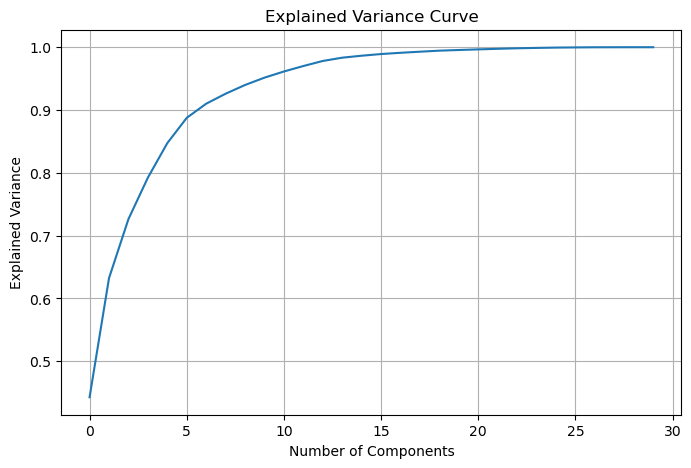

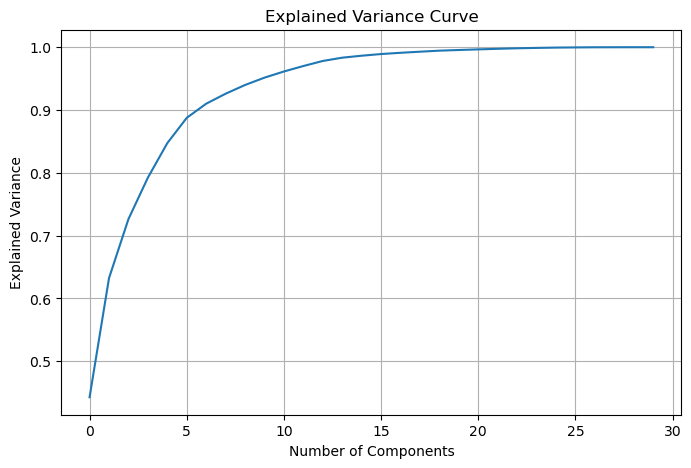

In [7]:
### ANSWER ###

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title('Explained Variance Curve')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()


### ALT. ANSWER ###

explained_variance = []
variance = 0
for i in range(len(scaled_df.columns)):
    variance += pca_full.explained_variance_ratio_[i]
    explained_variance.append(variance)

plt.figure(figsize=(8,5))
plt.plot(explained_variance)
plt.title('Explained Variance Curve')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

<font size=8 color="#009600">&#9998;</font> About how many Principal Components does it take to cover $90\%$ of the variance in the data?

answer here

### 2.3 Transforming Data with PCA

To move data into a lower dimensional space with PCA, we can use the `transform(data)` method. Since we can only visualize data in $2$ and $3$ dimensions, let's try transforming data using $2$ and $3$ principal components.

#### 2.3.1 2d Transform

<font size=8 color="#009600">&#9998;</font> Do this - Create a new pca object with only 2 principal components and transform the data into this 2d space. How much of the total variance is explained by these two principal components?

(note: Is there another method that lets you fit and transform with only one line of code?)


In [8]:
### ANSWER ###

pca_2 = PCA(n_components=2) # specify 2 principal components

pca_2.fit(scaled_df)

trans_pca_2 = pca_2.transform(scaled_df)  # could also do trans_pca_2 = pca.fit_transform(scaled_df) OR pca_2.fit(scaled_df).transform(scaled_df)

print("total explained variance:",round(sum(pca_2.explained_variance_ratio_),3))
pd.DataFrame(trans_pca_2,columns=['Principal Component 1', 'Principal Component 2']).head()


total explained variance: 0.632


,Principal Component 1,Principal Component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


#### 2.3.2 2d Transformed Data Plot

<font size=8 color="#009600">&#9998;</font> Do this - Make a scatter plot of the transformed data (now in 2d) with the two principal components as axes. Color the points in the scatter plot by if the corresponding cell is malignant or not.

Hint: To get the colors working in the `c = ` argument, try casting the dataframe with the target data as a numpy array. You'll need to transpose / index the array to get the data in the form matplotlib needs.

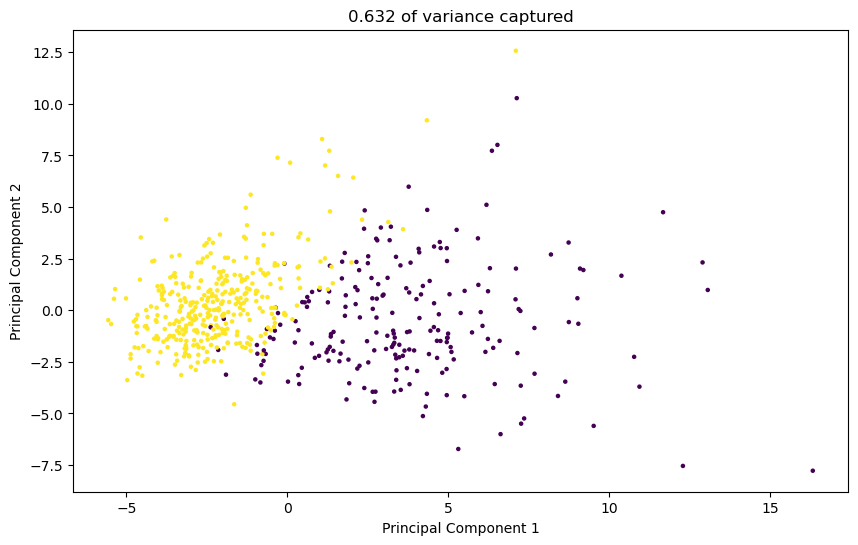

In [9]:
### ANSWER ###

plt.figure(figsize = (10,6))
plt.scatter(trans_pca_2[:,0],trans_pca_2[:,1], c = target.to_numpy().T[0], s = 5)
plt.title(str(round(sum(pca_2.explained_variance_ratio_),3)) + ' of variance captured')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### 2.3.3 Observations

 What kind of structure do you see in this transformed data? Is it seperable? If yes (or mostly yes), **how** is it separable?

answer here

#### 2.3.3 3d Transform

<font size=8 color="#009600">&#9998;</font> Repeat the procedure from 2.3.1 - 2.3.3 but in 3d. Here some [documentation](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) on `mplot3d`, which you can use to make a 3d scatter plot.

total explained variance: 0.726


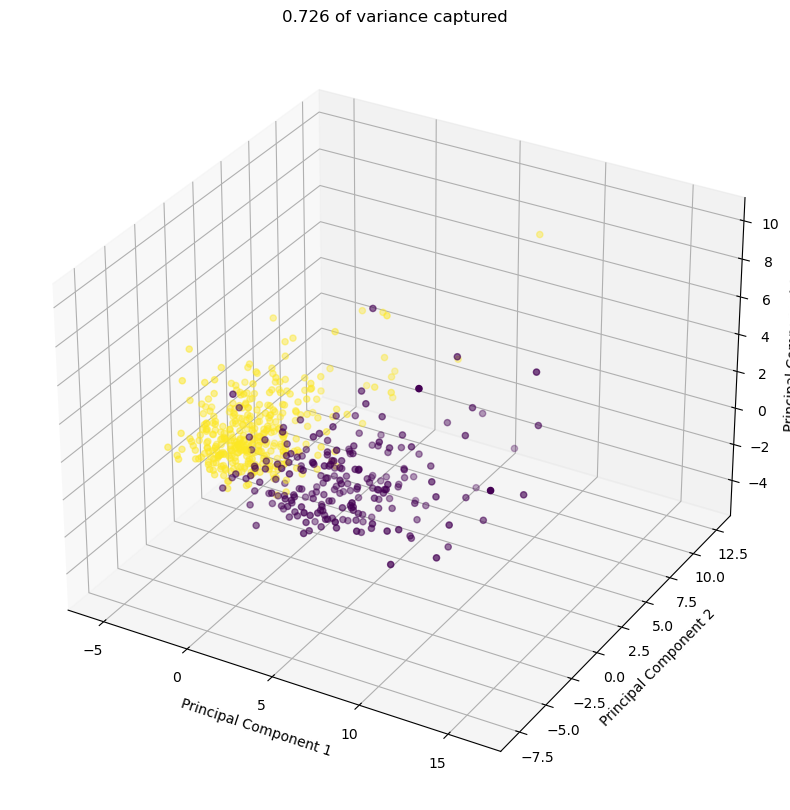

In [10]:
pca_3 = PCA(n_components=3)
pca_3.fit(scaled_df)
trans_pca_3 = pca_3.transform(scaled_df)
print("total explained variance:",round(sum(pca_3.explained_variance_ratio_),3))

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(trans_pca_3[:,0],trans_pca_3[:,1],trans_pca_3[:,2], c = target.to_numpy().T[0])
ax.set_title(str(round(sum(pca_3.explained_variance_ratio_),3)) + ' of variance captured')
ax.set_zlabel('Principal Component 3')
ax.set_ylabel('Principal Component 2')
ax.set_xlabel('Principal Component 1')

plt.show()

## 3. (Time Permitting) Kernel PCA

Standard PCA is extremely useful for data that is linearly separable, but it falls short when data has nonlinear structure. In those cases, Kernel PCA may be of use. Kernel PCA is similar in concept to Support Vector Machines (SVMs), as it works by using a kernel function to move data into a higher dimensional space, where the data may become linearly seperable, and hence a typical PCA is effective.

Here's some circles like we saw last class:

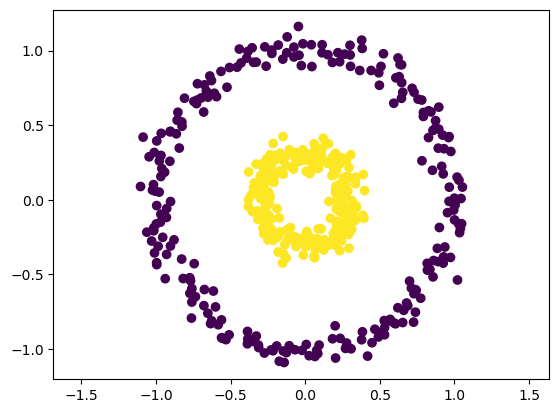

In [11]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.06, random_state=10)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

### 3.1 Standard PCA on Nonlinear Data

<font size=8 color="#009600">&#9998;</font> Try using a regular PCA to transform this data (but don't change the dimensionality) and plot the results.

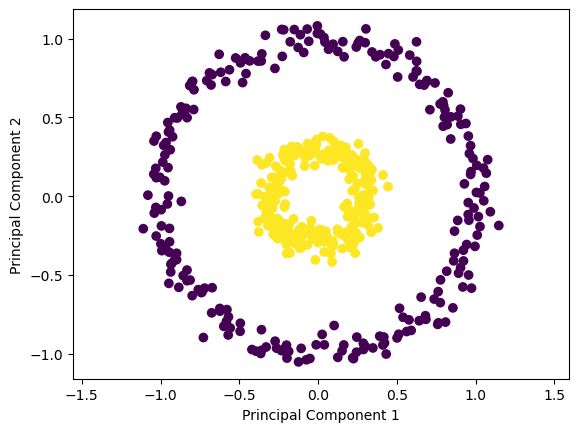

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<font size=8 color="#009600">&#9998;</font> What does your group observe?

answer here

### 3.2 Trying Kernel PCA

<font size=8 color="#009600">&#9998;</font> Now try using a Kernel PCA to transform the data. Try to find a kernel and set of parameters that separate the data linearly. What do you observe? (Hint: the `'rbf'` kernel is sensitive to different values of `gamma`)

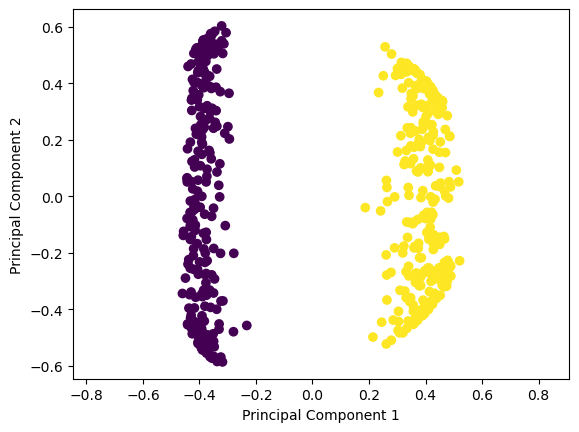

In [13]:
kernel_pca = KernelPCA(kernel="rbf", gamma=2)

X_kernel_pca = kernel_pca.fit(X).transform(X)

plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y)
plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


answer here

A Few Other Dimension Reduction Techniques of note:

- Linear Discriminant Analysis (LDA): Used with classifiers, finds the linear combination of features for separating the data.
- t-distributed stochastic neighbor embedding (t-SNE): Nonlinear Method, good for visualizing datasets in 2 and 3 dimensions. 
 - Incremental PCA: Like a standard PCA but can be much more memory efficient in some cases.

This list is very much non-exhaustive.